In [10]:
import csv
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score,precision_recall_curve,auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
import joblib

from sklearn import model_selection
from tpot import TPOTClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostClassifier
#from pyearth import Earth
from sklearn.cross_decomposition import PLSRegression


from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from skfeature.function.statistical_based import t_score
from skfeature.function.statistical_based import gini_index
from skfeature.function.similarity_based import fisher_score
from skfeature.function.similarity_based import reliefF

from sklearn.feature_selection import mutual_info_classif
from skfeature.function.information_theoretical_based import LCSI
from skfeature.function.information_theoretical_based import MIM
from skfeature.function.information_theoretical_based import MIFS
from skfeature.function.information_theoretical_based import MRMR
from skfeature.function.information_theoretical_based import CIFE
from skfeature.function.information_theoretical_based import JMI
from skfeature.function.information_theoretical_based import CMIM
from skfeature.function.information_theoretical_based import ICAP
from skfeature.function.information_theoretical_based import DISR

from scipy.stats import wilcoxon

from sklearn.metrics import roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample


import warnings


file_train = open("./csv/train_new.csv")
csv_f = csv.reader(file_train)
features = next(csv_f)
dataset = pd.read_csv("./csv/train_new.csv", names=features, usecols=range(1,6132), dtype=np.float64, skiprows=1, low_memory=False)
# INITIALIZING, CLEANING, AND STRATIFYING DATASET
dataset["6131"] = pd.to_numeric(dataset["6131"], errors='coerce')
#dataset.dropna(axis=1, thresh=2, inplace=True)
#dataset.dropna(how='all',thresh = 20,inplace=True)
train_feature = np.array(dataset)
wh_inf = np.isinf(train_feature)
train_feature[wh_inf]=0
wh_nan = np.isnan(train_feature)
train_feature[wh_nan]=0

file_validate = open("./csv/validation_new.csv")
csv_f = csv.reader(file_validate)
features = next(csv_f)
dataset = pd.read_csv("./csv/validation_new.csv", names=features, usecols=range(1,6132), dtype=np.float64, skiprows=1, low_memory=False)
# INITIALIZING, CLEANING, AND STRATIFYING DATASET
dataset["6131"] = pd.to_numeric(dataset["6131"], errors='coerce')
#dataset.dropna(axis=1, thresh=2, inplace=True)
validate_feature = np.array(dataset)
wh_inf = np.isinf(validate_feature)
validate_feature[wh_inf]=0
wh_nan = np.isnan(validate_feature)
validate_feature[wh_nan]=0


file_test = open("./csv/test_new.csv")
csv_f = csv.reader(file_test)
features = next(csv_f)
dataset = pd.read_csv("./csv/test_new.csv", names=features, usecols=range(1,6132), dtype=np.float64, skiprows=1, low_memory=False)
# INITIALIZING, CLEANING, AND STRATIFYING DATASET
dataset["6131"] = pd.to_numeric(dataset["6131"], errors='coerce')
#dataset.dropna(axis=1, thresh=2, inplace=True)
test_feature = np.array(dataset)
wh_inf = np.isinf(test_feature)
test_feature[wh_inf]=0
wh_nan = np.isnan(test_feature)
test_feature[wh_nan]=0

X_train = train_feature[:,:6130]
Y_train = train_feature[:,6130]
Y_train = Y_train.astype('int32')

X_validate = validate_feature[:,:6130]
Y_validate = validate_feature[:,6130]
Y_validate = Y_validate.astype('int32')

X_test = test_feature[:,:6130]
Y_test = test_feature[:,6130]
Y_test = Y_test.astype('int32')

# test_new_LRM, new_seg_LRM
file_test_LRM = open("./csv/new_seg_LRM.csv")
csv_f = csv.reader(file_test_LRM)
features = next(csv_f)
dataset = pd.read_csv("./csv/new_seg_LRM.csv", names=features, usecols=range(1,6132), dtype=np.float64, skiprows=1, low_memory=False)
# INITIALIZING, CLEANING, AND STRATIFYING DATASET
dataset["6131"] = pd.to_numeric(dataset["6131"], errors='coerce')
#dataset.dropna(axis=1, thresh=2, inplace=True)
test_feature = np.array(dataset)
wh_inf = np.isinf(test_feature)
test_feature[wh_inf]=0
wh_nan = np.isnan(test_feature)
test_feature[wh_nan]=0
seed = 7

X_test_LRM = test_feature[:,:6130]
Y_test_LRM = test_feature[:,6130]
Y_test_LRM = Y_test_LRM.astype('int32')

np.random.seed(seed)
np.random.shuffle(X_train) 
np.random.seed(seed)
np.random.shuffle(Y_train)


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_validate = scaler.transform(X_validate)
X_test = scaler.transform(X_test)
X_test_LRM = scaler.transform(X_test_LRM)

from sklearn.decomposition import PCA
pca = PCA(n_components=33)
X_train_ = pca.fit_transform(X_train)

X_validate_ = pca.transform(X_validate)
X_test_ = pca.transform(X_test)
X_test_LRM_ = pca.transform(X_test_LRM)
print([round(i,4) for i in pca.explained_variance_ratio_])

[0.3307, 0.2254, 0.197, 0.0462, 0.0272, 0.0238, 0.016, 0.0125, 0.0117, 0.0087, 0.0075, 0.0071, 0.0055, 0.0051, 0.0044, 0.0038, 0.0036, 0.0034, 0.0028, 0.0025, 0.0024, 0.002, 0.0019, 0.0017, 0.0016, 0.0015, 0.0014, 0.0013, 0.0013, 0.0011, 0.0011, 0.0011, 0.001]


In [11]:
model = SVC(kernel='linear',probability=True,class_weight={1:0.58,0:0.42})

from sklearn.neural_network import MLPClassifier
from sklearn import metrics


# model = MLPClassifier(hidden_layer_sizes=17,solver='adam',random_state=7)
# model = AdaBoostClassifier()
model.fit(X_train_,Y_train)

Y_pred = model.predict(X_validate_)    
print("Accuracy: " + repr(accuracy_score(Y_validate, Y_pred)))
print("Sensitivity: " + repr(recall_score(Y_validate,Y_pred)))
tn,fp,fn,tp = confusion_matrix(Y_validate,Y_pred).ravel()
print("Specificity: " + repr(tn/(tn+fp)))
Y_prob = model.predict_proba(X_validate_)
print("AUC: "+repr(roc_auc_score(Y_validate,Y_prob[:,1])))
        
Y_pred = model.predict(X_test_)
print('#'*20)
print("Accuracy: " + repr(accuracy_score(Y_test, Y_pred)))
print("Sensitivity: " + repr(recall_score(Y_test,Y_pred)))
tn,fp,fn,tp = confusion_matrix(Y_test,Y_pred).ravel()
print("Specificity: " + repr(tn/(tn+fp)))
Y_prob = model.predict_proba(X_test_)
print("AUC: "+repr(roc_auc_score(Y_test,Y_prob[:,1])))

Y_pred = model.predict(X_test_LRM_)
print('#'*20)
print("Accuracy: " + repr(accuracy_score(Y_test_LRM, Y_pred)))
print("Sensitivity: " + repr(recall_score(Y_test_LRM,Y_pred)))
tn,fp,fn,tp = confusion_matrix(Y_test_LRM,Y_pred).ravel()
print("Specificity: " + repr(tn/(tn+fp)))
Y_prob = model.predict_proba(X_test_LRM_)
print("AUC: "+repr(roc_auc_score(Y_test_LRM,Y_prob[:,1])))
fpr, tpr, thresholds= metrics.precision_recall_curve(Y_test_LRM,Y_prob[:,1], pos_label=1)
print(metrics.auc(tpr,fpr))

Accuracy: 0.7319587628865979
Sensitivity: 0.7804878048780488
Specificity: 0.6964285714285714
AUC: 0.8458188153310106
####################
Accuracy: 0.75
Sensitivity: 0.7
Specificity: 0.7857142857142857
AUC: 0.8125
####################
Accuracy: 0.7083333333333334
Sensitivity: 0.7368421052631579
Specificity: 0.6
AUC: 0.7315789473684211
0.928889275756726


In [5]:
print(Y_pred)
print(Y_test_LRM)

[1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0]
[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [20]:
# HCC vs ICC 0 vs 1=56:41 val
# 28:20
# LR-M: 5:19
import sys
#p is proportion of trials that were successes
#n is the number of trials
import math
def adjusted_wald(p, n, z=1.96):
    p_adj = (n * p + (z**2)/2)/(n+z**2)
    n_adj = n + z**2
    span = z * math.sqrt(p_adj*(1-p_adj)/n_adj)
    return max(0, p_adj - span), min(p_adj + span, 1.0)
print("({:.2f}-{:.2f})".format(*adjusted_wald(float(0.81), float(24))))
print("({:.2f}-{:.2f})".format(*adjusted_wald(float(0.80), float(19))))
print("({:.2f}-{:.2f})".format(*adjusted_wald(float(0.85), float(5))))

(0.61-0.92)
(0.57-0.93)
(0.40-1.00)


In [33]:
# 50,22,28
# 0.74,0.64,0.82
# 0.72,0.64,0.79
import sys
from scipy.stats import binom_test
#x accuracy
#n = number of trials
#p accuracy compare to
x = 0.80
n = 5
p = 0.85

print(binom_test(int(x * n), n, p))

0.5562946875000001


In [49]:
print(len(Y_train[Y_train==1]))#145:198
print(len(Y_validate[Y_validate==1]))
print(len(Y_test[Y_test==1]))
#0:198,56,28
#1:145,41,20

145
41
20


In [3]:
file_test = open("./csv/new_seg.csv")
csv_f = csv.reader(file_test)
features = next(csv_f)
dataset = pd.read_csv("./csv/new_seg.csv", names=features, usecols=range(1,6132), dtype=np.float64, skiprows=1, low_memory=False)
# INITIALIZING, CLEANING, AND STRATIFYING DATASET
dataset["6131"] = pd.to_numeric(dataset["6131"], errors='coerce')
#dataset.dropna(axis=1, thresh=2, inplace=True)
test_feature = np.array(dataset)
wh_inf = np.isinf(test_feature)
test_feature[wh_inf]=0
wh_nan = np.isnan(test_feature)
test_feature[wh_nan]=0

X_test_new = test_feature[:,:6130]
Y_test_new = test_feature[:,6130]
Y_test_new = Y_test.astype('int32')



pipe = joblib.load('pkl/tpot_uterus_8.pkl')
        
Y_pred = pipe.predict(X_test_new)
Y_prob = pipe.predict_proba(X_test_new)
print("Accuracy: " + repr(accuracy_score(Y_test, Y_pred)))
print("AUC: " + repr(roc_auc_score(Y_test, Y_prob[:,1])))
print("Sensitivity" + repr(recall_score(Y_test,Y_pred)))
tn,fp,fn,tp = confusion_matrix(Y_test,Y_pred).ravel()
print("Specificity" + repr(tn/(tn+fp)))
fpr, tpr, thresholds= precision_recall_curve(Y_test, Y_prob[:,1], pos_label=1)
auc = metrics.auc(tpr,fpr)
print(auc)

X_test_new = scaler.transform(X_test_new)
X_test_new_ = pca.transform(X_test_new)

Y_pred = model.predict(X_test_new_)

#joblib.dump(model,'./pcasvm.pkl')

print('#'*20)
print("Accuracy: " + repr(accuracy_score(Y_test, Y_pred)))
print("Sensitivity: " + repr(recall_score(Y_test,Y_pred)))
tn,fp,fn,tp = confusion_matrix(Y_test,Y_pred).ravel()
print("Specificity: " + repr(tn/(tn+fp)))
Y_prob = model.predict_proba(X_test_)
print("AUC: "+repr(roc_auc_score(Y_test,Y_prob[:,1])))
fpr, tpr, thresholds= precision_recall_curve(Y_test, Y_prob[:,1], pos_label=1)
auc = metrics.auc(tpr,fpr)
print(auc)

Accuracy: 0.7708333333333334
AUC: 0.780357142857143
Sensitivity0.6
Specificity0.8928571428571429
0.7765091669746991
####################
Accuracy: 0.75
Sensitivity: 0.7
Specificity: 0.7857142857142857
AUC: 0.8125
0.784969875512348


Accuracy: 0.75
AUC: 0.8017857142857142
Sensitivity0.7
Specificity0.7857142857142857
0.8062412293566943
Accuracy: 0.7291666666666666
AUC: 0.7821428571428571
Sensitivity0.65
Specificity0.7857142857142857
0.7514916469445558
0.5319148936170213
0.6571428571428571
0.7391304347826086
0.7428571428571429


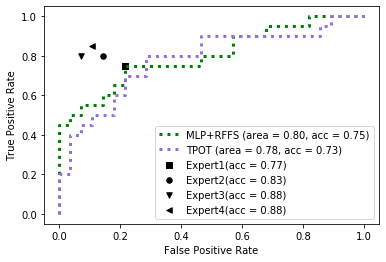

In [35]:
from sklearn.metrics import cohen_kappa_score
# cohen_kappa_score(Y_train, Y_pred)
file_test = open("./csv/test_new.csv")
csv_f = csv.reader(file_test)
features = next(csv_f)
dataset = pd.read_csv("./csv/test_new.csv", names=features, usecols=range(1,6132), dtype=np.float64, skiprows=1, low_memory=False)
# INITIALIZING, CLEANING, AND STRATIFYING DATASET
dataset["6131"] = pd.to_numeric(dataset["6131"], errors='coerce')
#dataset.dropna(axis=1, thresh=2, inplace=True)
test_feature = np.array(dataset)
wh_inf = np.isinf(test_feature)
test_feature[wh_inf]=0
wh_nan = np.isnan(test_feature)
test_feature[wh_nan]=0


X_test = test_feature[:,:6130]
Y_test = test_feature[:,6130]
Y_test = Y_test.astype('int32')
seed = 7

pipe = joblib.load('./handpkl/NNetRELF120.pkl')
Y_pred = pipe.predict(X_test)
Y_prob = pipe.predict_proba(X_test)
print("Accuracy: " + repr(accuracy_score(Y_test, Y_pred)))
print("AUC: " + repr(roc_auc_score(Y_test, Y_prob[:,1])))
print("Sensitivity" + repr(recall_score(Y_test,Y_pred)))
tn,fp,fn,tp = confusion_matrix(Y_test,Y_pred).ravel()
print("Specificity" + repr(tn/(tn+fp)))
fpr, tpr, thresholds= precision_recall_curve(Y_test, Y_prob[:,1], pos_label=1)
auc = metrics.auc(tpr,fpr)
print(auc)


from sklearn import metrics
import matplotlib.pyplot as plt

#plot for tpot
fpr, tpr, thresholds= metrics.roc_curve(Y_test, Y_prob[:,1], pos_label=1)
auc = metrics.auc(fpr,tpr)
plt.plot(fpr, tpr,
         label='MLP+RFFS (area = {0:0.2f}, acc = 0.75)'
         ''.format(auc),
         color='green', linestyle=':', linewidth=3)

pipe = joblib.load('pkl/tpot_uterus_8.pkl')
        
Y_pred = pipe.predict(X_test)
Y_prob = pipe.predict_proba(X_test)
print("Accuracy: " + repr(accuracy_score(Y_test, Y_pred)))
print("AUC: " + repr(roc_auc_score(Y_test, Y_prob[:,1])))
print("Sensitivity" + repr(recall_score(Y_test,Y_pred)))
tn,fp,fn,tp = confusion_matrix(Y_test,Y_pred).ravel()
print("Specificity" + repr(tn/(tn+fp)))
fpr, tpr, thresholds= precision_recall_curve(Y_test, Y_prob[:,1], pos_label=1)
auc = metrics.auc(tpr,fpr)
print(auc)

from sklearn import metrics
import matplotlib.pyplot as plt

#plot for tpot
fpr, tpr, thresholds= metrics.roc_curve(Y_test, Y_prob[:,1], pos_label=1)
auc = metrics.auc(fpr,tpr)
plt.plot(fpr, tpr,
         label='TPOT (area = {0:0.2f}, acc = 0.73)'
         ''.format(auc),
         color='mediumpurple', linestyle=':', linewidth=3)



import numpy as np
file = open('./csv/experts_outcome.csv','r')
expert = []
for index,row in enumerate(csv.reader(file)):
    if index == 0:
        continue
    tmp = [int(row[1]),int(row[2]),int(row[3]),int(row[4]),int(row[5])]
    expert.append(tmp)
expert = np.array(expert)
Y_test = expert[:,4]
expert1 = expert[:,0]
expert2 = expert[:,1]
expert3 = expert[:,2]
expert4 = expert[:,3]


#plot for expert1
fpr, tpr, thresholds= metrics.roc_curve(Y_test, expert1, pos_label=1)
acc_1 = accuracy_score(Y_test, expert1)
plt.scatter(fpr[1],tpr[1], marker = 's', color = 'black', label='Expert1(acc = {0:0.2f})'
            ''.format(acc_1), s = 30)

#plot for expert2
fpr, tpr, thresholds= metrics.roc_curve(Y_test, expert2, pos_label=1)
acc_2 = accuracy_score(Y_test, expert2)
plt.scatter(fpr[1], tpr[1], marker = 'o', color = 'black', label='Expert2(acc = {0:0.2f})'
            ''.format(acc_2), s = 30)

#plot for expert3
fpr, tpr, thresholds= metrics.roc_curve(Y_test, expert3, pos_label=1)
acc_3 = accuracy_score(Y_test, expert3)
plt.scatter(fpr[1], tpr[1], marker = 'v', color = 'black', label='Expert3(acc = {0:0.2f})'
            ''.format(acc_3), s = 30)

#plot for expert4
fpr, tpr, thresholds= metrics.roc_curve(Y_test, expert4, pos_label=1)
acc_4 = accuracy_score(Y_test, expert4)
plt.scatter(fpr[1], tpr[1], marker = '<', color = 'black', label='Expert4(acc = {0:0.2f})'
            ''.format(acc_4), s = 30)


plt.legend(loc = 'lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('roc.tif',dpi=300)
plt.show()

Accuracy: 0.75
AUC: 0.8017857142857142
Sensitivity0.7
Specificity0.7857142857142857
0.8062412293566943
Accuracy: 0.7291666666666666
AUC: 0.7821428571428571
Sensitivity0.65
Specificity0.7857142857142857


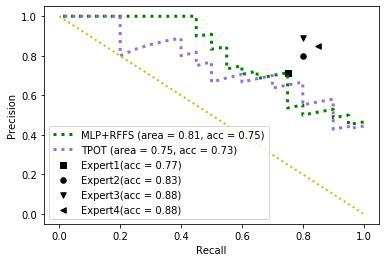

In [41]:
file_test = open("./csv/test_new.csv")
csv_f = csv.reader(file_test)
features = next(csv_f)
dataset = pd.read_csv("./csv/test_new.csv", names=features, usecols=range(1,6132), dtype=np.float64, skiprows=1, low_memory=False)
# INITIALIZING, CLEANING, AND STRATIFYING DATASET
dataset["6131"] = pd.to_numeric(dataset["6131"], errors='coerce')
#dataset.dropna(axis=1, thresh=2, inplace=True)
test_feature = np.array(dataset)
wh_inf = np.isinf(test_feature)
test_feature[wh_inf]=0
wh_nan = np.isnan(test_feature)
test_feature[wh_nan]=0


X_test = test_feature[:,:6130]
Y_test = test_feature[:,6130]
Y_test = Y_test.astype('int32')
seed = 7

pipe = joblib.load('./handpkl/NNetRELF120.pkl')

      
Y_pred = pipe.predict(X_test)
Y_prob = pipe.predict_proba(X_test)
print("Accuracy: " + repr(accuracy_score(Y_test, Y_pred)))
print("AUC: " + repr(roc_auc_score(Y_test, Y_prob[:,1])))
print("Sensitivity" + repr(recall_score(Y_test,Y_pred)))
tn,fp,fn,tp = confusion_matrix(Y_test,Y_pred).ravel()
print("Specificity" + repr(tn/(tn+fp)))


from sklearn import metrics
import matplotlib.pyplot as plt

#plot for tpot
fpr, tpr, thresholds= metrics.precision_recall_curve(Y_test, Y_prob[:,1], pos_label=1)
auc = metrics.auc(tpr,fpr)
print(auc)
plt.plot(tpr, fpr,
         label='MLP+RFFS (area = {0:0.2f}, acc = 0.75)'
         ''.format(auc),
         color='green', linestyle=':', linewidth=3)


pipe = joblib.load('pkl/tpot_uterus_8.pkl')

      
Y_pred = pipe.predict(X_test)
Y_prob = pipe.predict_proba(X_test)
print("Accuracy: " + repr(accuracy_score(Y_test, Y_pred)))
print("AUC: " + repr(roc_auc_score(Y_test, Y_prob[:,1])))
print("Sensitivity" + repr(recall_score(Y_test,Y_pred)))
tn,fp,fn,tp = confusion_matrix(Y_test,Y_pred).ravel()
print("Specificity" + repr(tn/(tn+fp)))


from sklearn import metrics
import matplotlib.pyplot as plt

#plot for tpot
fpr, tpr, thresholds= metrics.precision_recall_curve(Y_test, Y_prob[:,1], pos_label=1)
auc = metrics.auc(tpr,fpr)
plt.plot(tpr, fpr,
         label='TPOT (area = {0:0.2f}, acc = 0.73)'
         ''.format(auc),
         color='mediumpurple', linestyle=':', linewidth=3)


fpr, tpr, thresholds= metrics.precision_recall_curve(Y_test, expert1, pos_label=1)
acc_1 = accuracy_score(Y_test, expert1)
plt.scatter(tpr[1],fpr[1], marker = 's', color = 'black', label='Expert1(acc = {0:0.2f})'
            ''.format(acc_1), s = 30)

fpr, tpr, thresholds= metrics.precision_recall_curve(Y_test, expert2, pos_label=1)
acc_1 = accuracy_score(Y_test, expert2)
plt.scatter(tpr[1],fpr[1], marker = 'o', color = 'black', label='Expert2(acc = {0:0.2f})'
            ''.format(acc_1), s = 30)

fpr, tpr, thresholds= metrics.precision_recall_curve(Y_test, expert3, pos_label=1)
acc_1 = accuracy_score(Y_test, expert3)
plt.scatter(tpr[1],fpr[1], marker = 'v', color = 'black', label='Expert3(acc = {0:0.2f})'
            ''.format(acc_1), s = 30)

fpr, tpr, thresholds= metrics.precision_recall_curve(Y_test, expert4, pos_label=1)
acc_1 = accuracy_score(Y_test, expert4)
plt.scatter(tpr[1],fpr[1], marker = '<', color = 'black', label='Expert4(acc = {0:0.2f})'
            ''.format(acc_1), s = 30)

plt.plot([0,1],[1,0],color='y',linestyle=':',linewidth=2)

plt.legend(loc = 'lower left')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.savefig('prroc.tif',dpi=300)
plt.show()

In [46]:
print(cohen_kappa_score(expert4, expert1))
print(cohen_kappa_score(expert4, expert2))
print(cohen_kappa_score(expert4, expert3))
print(cohen_kappa_score(expert4, expert4))

0.5319148936170213
0.5714285714285714
0.6521739130434783
1.0
